# Real Data

Load the Housing_Price.csv and see the feature_discription.txt for more insight (However you don't need to remove any unneccesary feature just use encoding to convert the categorical features)

In [204]:
import pandas as pd
# loading data and setting Id as index
Housing_Price = pd.read_csv("files/Housing_Price.csv").set_index("Id")

In [205]:
#Displaying the data
Housing_Price

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,MoSold,YrSold,SalePrice,Street,Condition1,Condition2,CentralAir,HeatingQC,LotShape,LandContour
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,2,2008,208500,Pave,Norm,Norm,Y,Ex,Reg,Lvl
2,20,9600,6,8,1976,1976,978,0,284,1262,...,5,2007,181500,Pave,Feedr,Norm,Y,Ex,Reg,Lvl
3,60,11250,7,5,2001,2002,486,0,434,920,...,9,2008,223500,Pave,Norm,Norm,Y,Ex,IR1,Lvl
4,70,9550,7,5,1915,1970,216,0,540,756,...,2,2006,140000,Pave,Norm,Norm,Y,Gd,IR1,Lvl
5,60,14260,8,5,2000,2000,655,0,490,1145,...,12,2008,250000,Pave,Norm,Norm,Y,Ex,IR1,Lvl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0,0,953,953,...,8,2007,175000,Pave,Norm,Norm,Y,Ex,Reg,Lvl
1457,20,13175,6,6,1978,1988,790,163,589,1542,...,2,2010,210000,Pave,Norm,Norm,Y,TA,Reg,Lvl
1458,70,9042,7,9,1941,2006,275,0,877,1152,...,5,2010,266500,Pave,Norm,Norm,Y,Ex,Reg,Lvl


which are categorical and which are numerical features?

In [206]:
# Determining the categorical and numerical features of the dataset
categorical_features = []
numerical_features = []
for feat in Housing_Price:
    if str(Housing_Price[feat].dtype)=='object':
        categorical_features.append(feat)
    elif "int" in str(Housing_Price[feat].dtype) or "float" in str(Housing_Price[feat].dtype):
        numerical_features.append(feat)
        
print("\033[1mThe categorical features of the data set are:\033[0m \n"+str(categorical_features),end="\n\n")
print("\033[1mThe numerical features of the data set are:\033[0m \n"+str(numerical_features))


The categorical features of the data set are: 
['Street', 'Condition1', 'Condition2', 'CentralAir', 'HeatingQC', 'LotShape', 'LandContour']

The numerical features of the data set are: 
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Write a function for doing one hot encoding for all categorical features

Hint: Use pandas.get_dummies

In [207]:
def onehot_encoding(df,columns=None):
    '''
    Takes the dataframe 
    columns which are corresponding to categorical features
    '''
    df = pd.get_dummies(df,columns=columns)
    return df

#Converting to one-hot encoding
Housing_Price = onehot_encoding(Housing_Price,categorical_features)

Seperate the Label from the data, here it is 'SalePrice'

In [208]:
#Separating "SalesPrice" from the original data and storing it as the label
Sales_Price = Housing_Price["SalePrice"]
del Housing_Price["SalePrice"]

In [209]:
# Visualize the changed dataframe
Housing_Price

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC_Po,HeatingQC_TA,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,0,1,0,0,0,1
2,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,0,1,0,0,0,1
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,1,0,0,0,0,0,0,1
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,1,0,0,0,0,0,0,1
5,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0,0,953,953,...,0,0,0,0,0,1,0,0,0,1
1457,20,13175,6,6,1978,1988,790,163,589,1542,...,0,1,0,0,0,1,0,0,0,1
1458,70,9042,7,9,1941,2006,275,0,877,1152,...,0,0,0,0,0,1,0,0,0,1


Split train test split with random state 42, test size 0.2

You can use sklearn module for this exercise

In [210]:
# import your Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

In [211]:
# Split data here 
X_train, X_test, y_train, y_test = train_test_split(Housing_Price,Sales_Price, test_size = 0.2, random_state = 42)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

## Lasso Regression

1. search for alphas in range of 0.1 to 1000 for Lasso rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE  

Hint:   
- cross validation score gives accuracy not the error convert to error appropriately (otherwise choose lambda which maximizes the score)


In the following cell, use training which was split earlier to cross validate (using cross_val_score) use cv = 5 (5 folds), then calculate the mean of the cross validation score for each alphas and plot $\lambda$ vs cross_valiadtion_score  or cross_validation_error. If you choose the accuracy then choose the $\lambda$ which maximizes the cross_val_score. 

For range of alphas use  alphas = np.logspace(-1, 3, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)

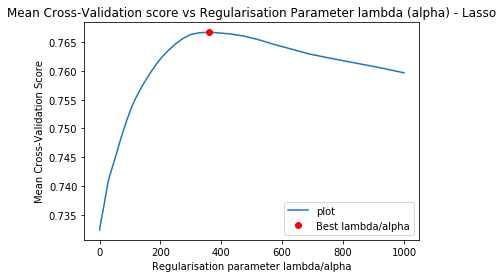

In [214]:
# Lasso Regression - Regularisation Parameter Search
alpha_values = np.logspace(-1,3,100)
cross_vals_lasso = []
for alpha in alpha_values:
    reg_lasso = Lasso(alpha = alpha,max_iter=10**6)
    score_list = cross_val_score(reg_lasso,X_train,y_train,cv = 5)
    #Taking mean of 5 CV scores
    cross_vals_lasso.append(sum(score_list)/5)
    
#Plotting
plt.plot(alpha_values,cross_vals_lasso)
plt.xlabel("Regularisation parameter lambda/alpha")
plt.ylabel("Mean Cross-Validation Score")
plt.title("Mean Cross-Validation score vs Regularisation Parameter lambda (alpha) - Lasso")
alpha_opt_lasso = alpha_values[cross_vals_lasso.index(max(cross_vals_lasso))]
plt.plot(alpha_opt_lasso,max(cross_vals_lasso),"or")
plt.legend(["plot","Best lambda/alpha"])

In [215]:
print("Optimum lambda/alpha that results in maximum cross-validation score: %f"%alpha_opt_lasso)
print("Maximum Cross-Validation Score: %f"%max(cross_vals_lasso))

Optimum lambda/alpha that results in maximum cross-validation score: 359.381366
Maximum Cross-Validation Score: 0.766721


## Ridge Regression

1. search for alphas in range of 0.1 to 100 for Ridge rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE


This similar to as explained for Lasso regression. Again plot $\lambda$ vs accuracy (or error) 

For range of alphas use  alphas = np.logspace(-1, 2, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)


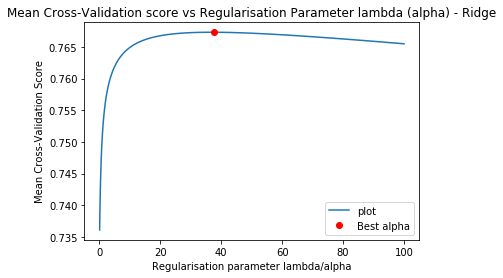

In [216]:
# Ridge Regression - Regularisation Parameter Search
alpha_values = np.logspace(-1,2,100)
cross_vals_ridge = []
for alpha in alpha_values:
    reg_ridge = Ridge(alpha = alpha,max_iter=10**6)
    score_list = cross_val_score(reg_ridge,X_train,y_train,cv = 5)
    #Taking mean of 5 CV scores
    cross_vals_ridge.append(sum(score_list)/5)
    
#Plotting
plt.plot(alpha_values,cross_vals_ridge)
plt.xlabel("Regularisation parameter lambda/alpha")
plt.ylabel("Mean Cross-Validation Score")
plt.title("Mean Cross-Validation score vs Regularisation Parameter lambda (alpha) - Ridge")
alpha_opt_ridge = alpha_values[cross_vals_ridge.index(max(cross_vals_ridge))]
plt.plot(alpha_opt_ridge,max(cross_vals_ridge),"or")
plt.legend(["plot","Best alpha"])

In [217]:
print("Optimum lambda/alpha that results in maximum cross-validation score: %f"%alpha_opt_ridge)
print("Maximum Cross-Validation Score: %f"%max(cross_vals_ridge))

Optimum lambda/alpha that results in maximum cross-validation score: 37.649358
Maximum Cross-Validation Score: 0.767319


Now compare regularized models to linear Regression model

In the following cell, calculate cross validation score using Linear Regression model

In [218]:
# Calculating Cross Validation score for simple linear regression
reg_linear = LinearRegression()
score_list = cross_val_score(reg_linear,X_train,y_train, cv =5)
cross_val_linear = sum(score_list)/5

In [219]:
print("\033[1mCross-Validation Score for Linear Regression without regularisaiton\033[0m = %f"%cross_val_linear)

Cross-Validation Score for Linear Regression without regularisaiton = 0.731913


**It can be observed that the cross-validation score with simple linear regression is lesser than those obtained from Ridge and Lasso Regularised Regression modelswith the optimimum value of lambda (alpha), with ridge model having the highest score of 0.7673**

Now you have $\lambda$ values for both ridge and lasso regression, predict the model on the test data you created earlier

In the following cell use selected $\lambda$ as the model parameter, predict on test data, compare among three models and report your findings. 




Finally use lasso regression to find the important features and write your observations and also what do you observe when you compare both coefficients of Ridge and Lasso ? Do you see any property of Lasso which is used?
 
Hint: 
- Check weights corresponding to each features


Note:
- Don't worry if you have huge error in prediction, it is possible, just compare among models and report which has lease error.


In [220]:
#linear model with no regularisation
print("\033[1mLinear Model without regularisation\033[0m")
reg_linear.fit(X_train,y_train)
print("Coefficients: \n")
feature_coeff_lin = pd.Series(reg_linear.coef_.flatten(),index=Housing_Price.columns)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(feature_coeff_lin)
    
print("\nIntercept: \n")
print(reg_linear.intercept_,end="\n\n")

#Predicting on test data
y_pred_lin = reg_linear.predict(X_test).reshape(-1,1)
#Calculating MSE
mse_lin = np.sum((y_pred_lin-y_test)**2)/len(y_test)
print("Test MSE for simple linear Regression = %f"%mse_lin,end = "\n\n")

Linear Model without regularisation
Coefficients: 

MSSubClass             -174.568153
LotArea                   0.462216
OverallQual           17594.616989
OverallCond            4491.264941
YearBuilt               335.758423
YearRemodAdd            138.787487
BsmtFinSF1               12.382085
BsmtFinSF2               -3.618867
BsmtUnfSF                -1.353687
TotalBsmtSF               7.409531
1stFlrSF                 14.871679
2ndFlrSF                 11.655131
LowQualFinSF              8.863129
GrLivArea                35.389940
BsmtFullBath           8704.702431
BsmtHalfBath          -3598.431914
FullBath               1755.390348
HalfBath                252.320829
BedroomAbvGr          -8304.254354
KitchenAbvGr         -11119.994853
TotRmsAbvGrd           5005.944750
Fireplaces             3906.861937
GarageCars             8409.794684
GarageArea                8.961866
WoodDeckSF               20.718350
OpenPorchSF              -4.758060
EnclosedPorch            12.363338
3Ss

In [221]:
#Lasso model - with lambda(alpha) = 359.381
print("\033[1mLasso Model with lambda (alpha) = %f"%alpha_opt_lasso+"\033[0m")
reg_lasso = Lasso(alpha=alpha_opt_lasso,max_iter=10**6)
reg_lasso.fit(X_train,y_train)
print("Coefficients: \n")

feature_coeff_lasso = pd.Series(reg_lasso.coef_,index=Housing_Price.columns)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(feature_coeff_lasso)
print("\nIntercept: \n")
print(reg_lasso.intercept_,end="\n\n")

#Predicting on test data
y_pred_lasso = reg_lasso.predict(X_test).reshape(-1,1)
#Calculating MSE
mse_lasso = np.sum((y_pred_lasso-y_test)**2)/len(y_test)
print("Test MSE for Lasso Regression = %f"%mse_lasso,end = "\n\n")

Lasso Model with lambda (alpha) = 359.381366
Coefficients: 

MSSubClass            -183.777177
LotArea                  0.395699
OverallQual          18500.951101
OverallCond           3432.178831
YearBuilt              314.327053
YearRemodAdd           173.956347
BsmtFinSF1              14.548230
BsmtFinSF2               0.000000
BsmtUnfSF                2.233262
TotalBsmtSF              1.700208
1stFlrSF                43.534317
2ndFlrSF                41.946652
LowQualFinSF            37.097535
GrLivArea                5.611505
BsmtFullBath          7877.489419
BsmtHalfBath            -0.000000
FullBath                 0.000000
HalfBath                -0.000000
BedroomAbvGr         -6816.675271
KitchenAbvGr            -0.000000
TotRmsAbvGrd          3809.730262
Fireplaces            3759.239103
GarageCars            7937.630221
GarageArea              11.420706
WoodDeckSF              27.232678
OpenPorchSF              0.322330
EnclosedPorch           11.021751
3SsnPorch            

In [222]:
#Ridge model - with lambda(alpha) = 37.649
print("\033[1mRidge Model with lambda (alpha) = %f"%alpha_opt_ridge+"\033[0m")
reg_ridge = Ridge(alpha=alpha_opt_ridge,max_iter=10**6)
reg_ridge.fit(X_train,y_train)
print("Coefficients: \n")
feature_coeff_ridge = pd.Series(reg_ridge.coef_.flatten(),index=Housing_Price.columns)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(feature_coeff_ridge)
print("\nIntercept: \n")
print(reg_ridge.intercept_,end="\n\n")

#Predicting on test data
y_pred_ridge = reg_ridge.predict(X_test).reshape(-1,1)

#Calculating MSE
mse_ridge = np.sum((y_pred_ridge-y_test)**2)/len(y_test)
print("Test MSE for Ridge Regression = %f"%mse_ridge,end = "\n\n")

Ridge Model with lambda (alpha) = 37.649358
Coefficients: 

MSSubClass            -176.219642
LotArea                  0.360275
OverallQual          17540.037180
OverallCond           4233.372718
YearBuilt              328.783030
YearRemodAdd           158.241795
BsmtFinSF1              11.249902
BsmtFinSF2              -3.552983
BsmtUnfSF               -1.039077
TotalBsmtSF              6.657842
1stFlrSF                13.598776
2ndFlrSF                11.959053
LowQualFinSF             8.272128
GrLivArea               33.829957
BsmtFullBath          8326.367252
BsmtHalfBath         -1654.508545
FullBath              1885.151340
HalfBath               -32.848715
BedroomAbvGr         -7349.848074
KitchenAbvGr         -4725.450018
TotRmsAbvGrd          4543.960677
Fireplaces            4623.492820
GarageCars            8092.348151
GarageArea              11.222400
WoodDeckSF              25.654866
OpenPorchSF             -2.637462
EnclosedPorch           12.462311
3SsnPorch             

**Among the three models, the mean-squared error of the test data is the least in the case of Ridge Regression.**

Lasso Regression yielded a sparse solution with many of the coefficients being zero (32 out of 67 features). On the other hand, Simple Linear Regression and Ridge Regression yielded non-sparse solutions.

Out of the remaining 35 features having non-zero coefficients in Lasso, 27 of them are positive and 8 of them are negative.

In [223]:
feature_coeff = pd.Series(reg_lasso.coef_,index=Housing_Price.columns)
print("Feature Coefficient in Descnding Order (Lasso):\n")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(feature_coeff.sort_values(ascending = False))

Feature Coefficient in Descnding Order (Lasso):

OverallQual          18500.951101
LandContour_HLS      13070.399598
Condition1_Norm      11896.447704
GarageCars            7937.630221
BsmtFullBath          7877.489419
HeatingQC_Ex          5186.673498
TotRmsAbvGrd          3809.730262
Fireplaces            3759.239103
OverallCond           3432.178831
LotShape_IR2          1592.067099
YearBuilt              314.327053
YearRemodAdd           173.956347
LotShape_IR1            70.461655
ScreenPorch             64.523821
1stFlrSF                43.534317
2ndFlrSF                41.946652
3SsnPorch               38.947306
LowQualFinSF            37.097535
WoodDeckSF              27.232678
BsmtFinSF1              14.548230
GarageArea              11.420706
EnclosedPorch           11.021751
GrLivArea                5.611505
BsmtUnfSF                2.233262
TotalBsmtSF              1.700208
LotArea                  0.395699
OpenPorchSF              0.322330
BsmtHalfBath            -0.000000

Upon observing the feature coefficients predicted by Lasso Regression model, the most important features with high positive coefficients are **OverallQual (Quality of overall material and finish of the house), LandContour_HLS (Hillside land contour), Condition1_Norm (normal proximity), GarageCars (Size of Garage), BsmtFullBath (Basement full bathrooms), HeatingQC_Ex (Excellent Heating Quality), TotRmsAbvGrd (Total rooms above grade), Fireplaces (Number of Fireplaces), OverallCond (Overall conditions), LotShape_IR2 (Moderately irregular shape of property), YearBuilt (Original Construction Date), YearRemodAdd (Remodel Date)**, in the decreasing order of their importance. These features have a positive effect on the increase in Sales Price.

The features with high negative coefficients are **MSSubClass (Dwelling type), YrSold (Year Sold), MoSold (Month Sold), LotShape_Reg (Regular Shape of property), LandContour_Bnk (Banked Land Contour), BedroomAbvGr (Bedrooms above grade)**. These features have a negative effect on the increase in sales price.

NOTE: There are other features which have small nonzero coefficients (eg. ScreenPorch, GarageArea, etc) in the Lasso model. They have comparitively low influence on the sales price.

The feature coefficients predicted by Lasso Regression model were different from those predicted by Ridge and linear regression models, which did not yield a sparse solution. There was no zero coefficients for any feature in the case of ridge regression. For example, the coefficients of features such as **BsmtHalfBath (Basement half bathrooms), FullBath (Full bathrooms above grade), KitchenAbvGr (Kitchens above grade),** and many others which are zero in the case of Lasso regression, were found to be non-zero in the case of Ridge regression (having values -1654.5,1885.15, -4725.45, respectively). Some of these features had positive and others had negative coefficients in the latter (Ridge).

It is also important to note that although most feature coefficients had the same sign in Ridge and Lasso (if they are not zero in Lasso), two features - **BsmtUnfSF (Unfinished sq ft of basement area)** and **OpenPorch (Open porch area)** had coefficients with opposite signs, as depicted below:

In [146]:
#Lasso feature coefficients of BsmtUnfSF and OpenPorchSF
feature_coeff_lasso["BsmtUnfSF"],feature_coeff_lasso["OpenPorchSF"]

(2.2332622668059794, 0.3223303373100734)

In [147]:
#Ridge feature coefficients of BsmtUnfSF and OpenPorchSF
feature_coeff_ridge["BsmtUnfSF"],feature_coeff_ridge["OpenPorchSF"]

(-1.0390774812719914, -2.6374617902148434)

Otherwise, in most cases, the non-zero features of Lasso Regression model were of the same order of magnitude as that of Ridge Regression Model.

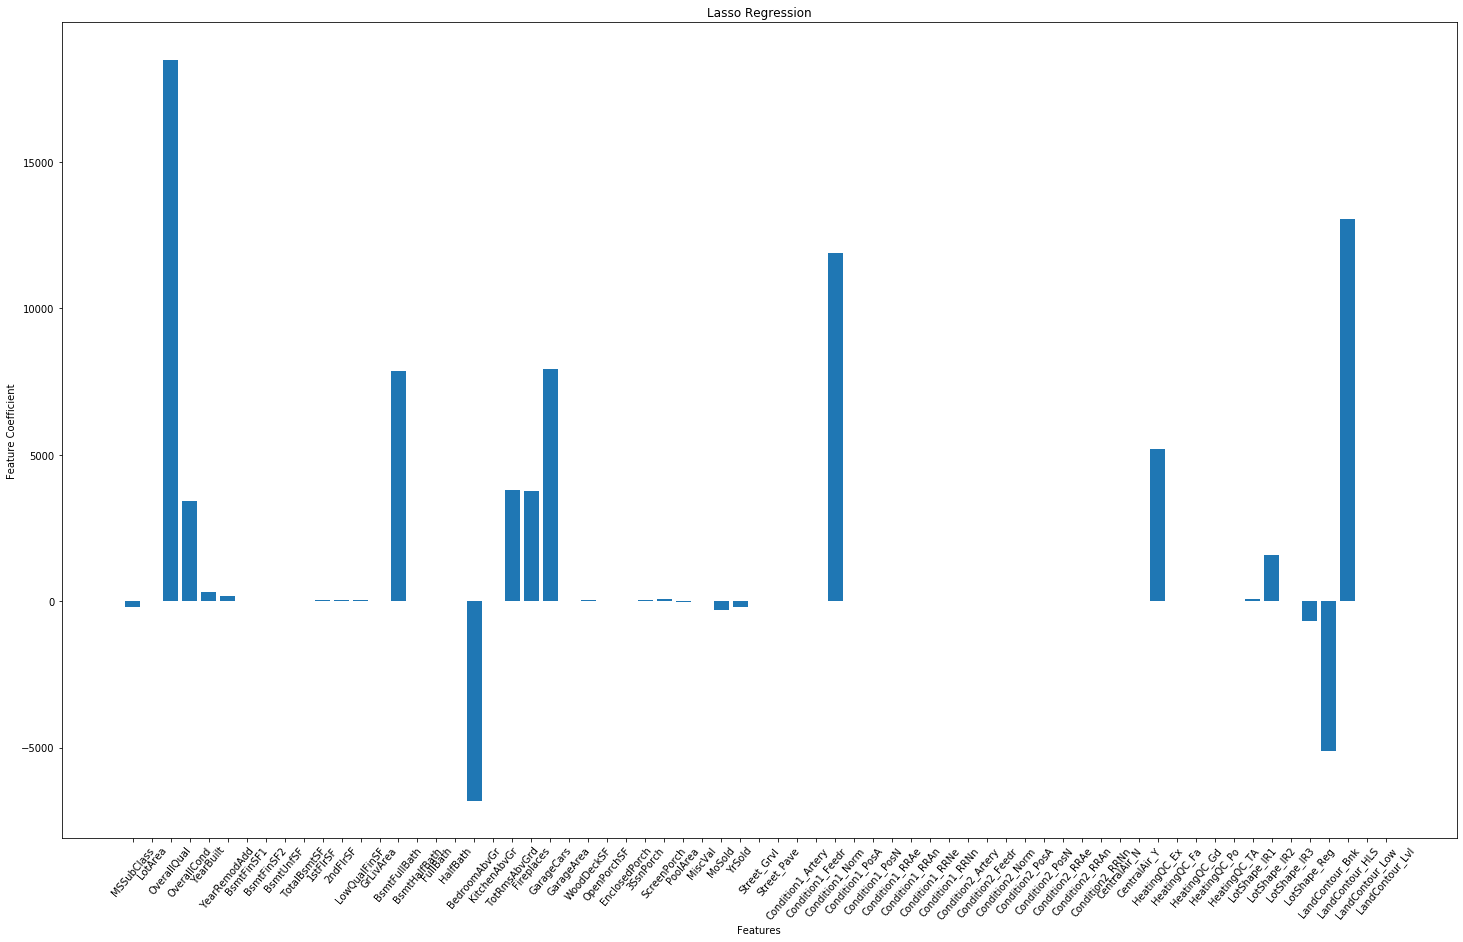

In [224]:
#Bar Plot Showing feature coefficients of Lasso Regression
plt.figure(figsize = (25,15))
plt.bar(feature_coeff_lasso.index,feature_coeff_lasso)
plt.ylabel("Feature Coefficient")
plt.xlabel("Features")
plt.title("Lasso Regression")
ax = plt.xticks(rotation = 50)

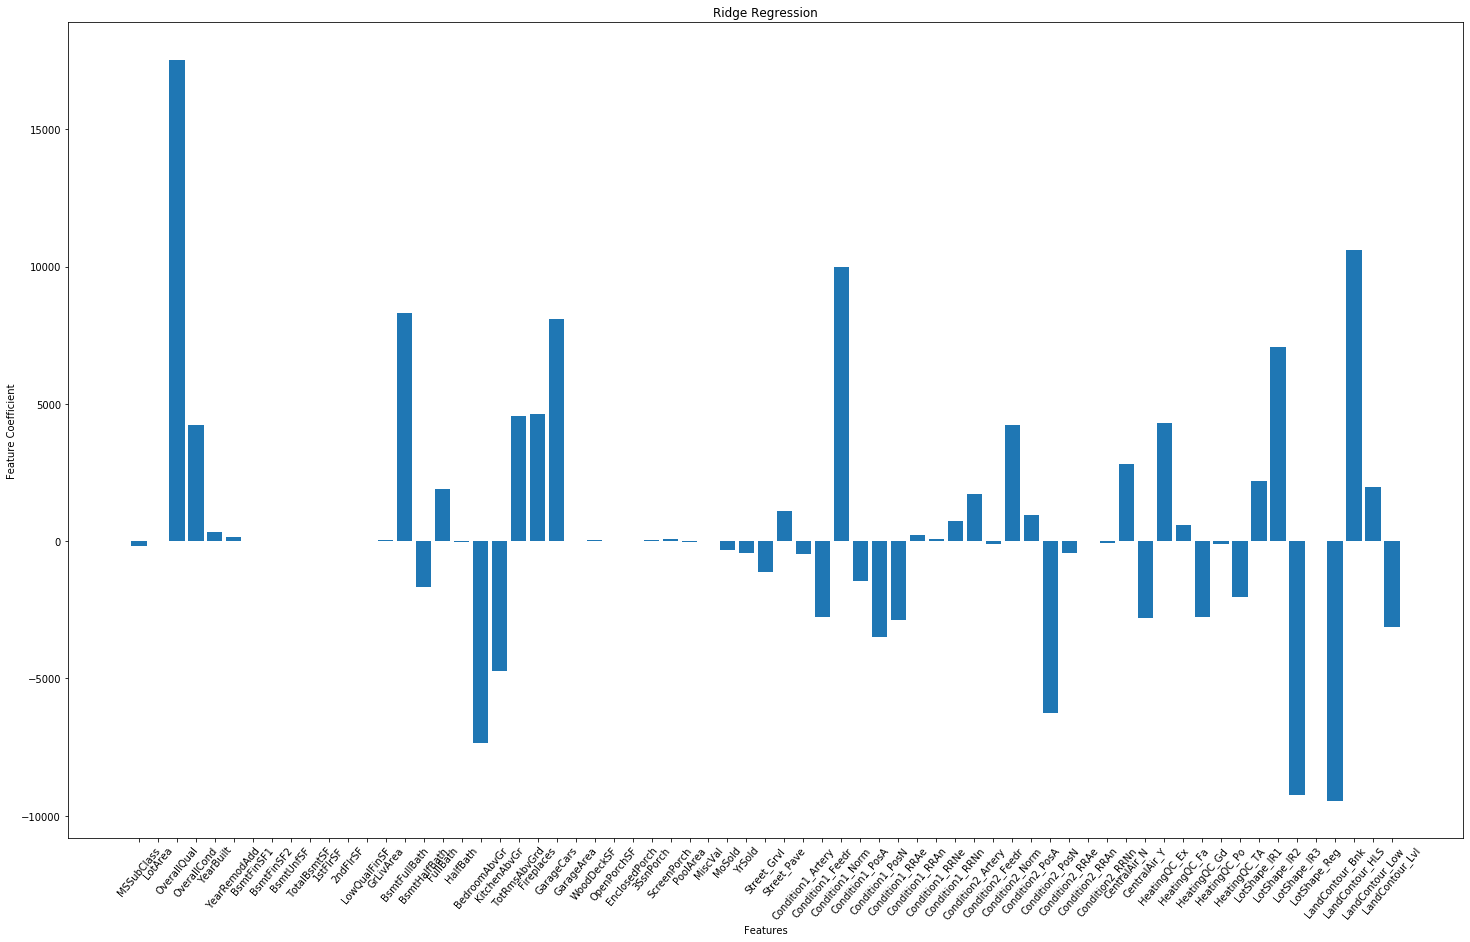

In [225]:
#Bar Plot Showing feature coefficients of Ridge Regression
plt.figure(figsize = (25,15))
plt.bar(feature_coeff_ridge.index,feature_coeff_ridge)
plt.ylabel("Feature Coefficient")
plt.xlabel("Features")
plt.title("Ridge Regression")
ax = plt.xticks(rotation = 50)

**These observation prove the fundamental property of Lasso Regression, which is feature selection. This property can be used to determine the important features of the dataset, while zeroing out others, thereby preventing overfitting. On the other hand, ridge regression might drive some coefficients close to zero but never absolute zero.**